In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:

# Read the CSV file into a pandas DataFrame
filename = './Kernelsfreq_Gru2_Features_allAtt_confonSpec_QMULTIMIT_NonedB.csv'
df = pd.read_csv(filename)

# Parse the 'ID' column
df['parsed_id'] = df['ID'].str.split('_')

# Extract the second to last piece of information for grouping
df['group'] = df['parsed_id'].apply(lambda x: x[-2])

# Extract the third piece of information for x-axis
df['source_dist'] = df['parsed_id'].apply(lambda x: x[2][:-1])

# Convert x_value to numeric (assuming it's numeric data)
df['source_dist'] = pd.to_numeric(df['source_dist'], errors='coerce')

df_filtered = df[df['group'] == 'classroomOmni']
# print(tf)
df_filtered


,Unnamed: 0,GT,Pred,L1,rL1,ID,parsed_id,group,source_dist
2,2,12.748,14.081473,1.333473,0.104603,55x_5y_12.748m_classroomOmni_4.wav,"[55x, 5y, 12.748m, classroomOmni, 4.wav]",classroomOmni,12.748
5,5,10.440,7.693706,2.746294,0.263055,10x_10y_10.440m_classroomOmni_0.wav,"[10x, 10y, 10.440m, classroomOmni, 0.wav]",classroomOmni,10.440
13,13,14.089,8.748188,5.340812,0.379077,55x_45y_14.089m_classroomOmni_3.wav,"[55x, 45y, 14.089m, classroomOmni, 3.wav]",classroomOmni,14.089
23,23,13.124,10.171403,2.952597,0.224977,5x_20y_13.124m_classroomOmni_3.wav,"[5x, 20y, 13.124m, classroomOmni, 3.wav]",classroomOmni,13.124
34,34,12.748,10.579328,2.168673,0.170119,5x_5y_12.748m_classroomOmni_1.wav,"[5x, 5y, 12.748m, classroomOmni, 1.wav]",classroomOmni,12.748
...,...,...,...,...,...,...,...,...,...
531,531,14.089,16.117195,2.028195,0.143956,5x_45y_14.089m_classroomOmni_0.wav,"[5x, 45y, 14.089m, classroomOmni, 0.wav]",classroomOmni,14.089
533,533,13.124,8.677067,4.446933,0.338840,55x_20y_13.124m_classroomOmni_0.wav,"[55x, 20y, 13.124m, classroomOmni, 0.wav]",classroomOmni,13.124
534,534,12.981,9.442796,3.538204,0.272568,55x_15y_12.981m_classroomOmni_3.wav,"[55x, 15y, 12.981m, classroomOmni, 3.wav]",classroomOmni,12.981
535,535,11.927,9.244543,2.682457,0.224906,10x_45y_11.927m_classroomOmni_4.wav,"[10x, 45y, 11.927m, classroomOmni, 4.wav]",classroomOmni,11.927


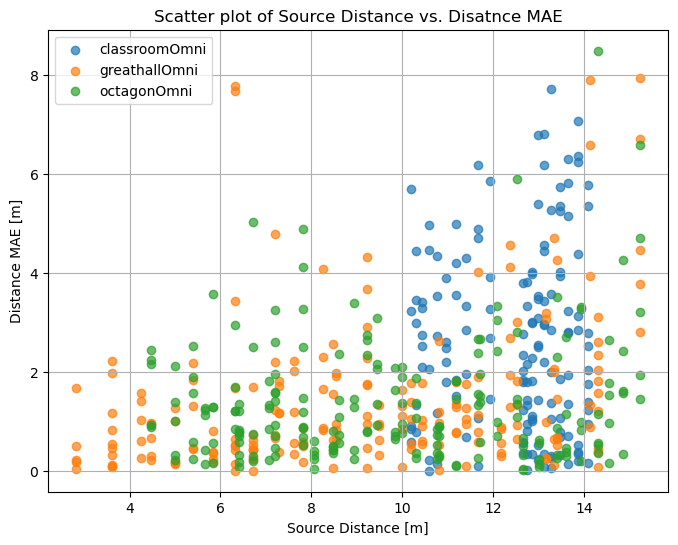

In [8]:
# Group the data
grouped = df.groupby('group')

# Create a scatter plot for each group
plt.figure(figsize=(8, 6))

for name, group in grouped:
    plt.scatter(group['source_dist'], group['L1'], label=name, alpha=0.7)

plt.xlabel('Source Distance [m]')
plt.ylabel('Distance MAE [m]')
plt.title('Scatter plot of Source Distance vs. Disatnce MAE')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [28]:
def classroom_get_distance(x, y):
    from math import sqrt
    from numpy import round
    xc = 30
    y0 = 1.5
    
    x_real = (x - xc) * 0.1
    y_real = y*0.1 + y0
    
    dist = sqrt(x_real**2 + y_real**2)
    
    return x_real, y_real, round(dist,3)
    
classroom_get_distance(0, 45)

(-3.0, 6.0, 6.708)